In [26]:
import os
import copy
import json
DATA_ROOT = r"/home/batman/Dropbox/DATA/02 fashionmnist"
PROJECT_ROOT = r"/home/batman/git/hack_fashion_mnist"
path_run = os.path.join(PROJECT_ROOT,'Runs','baseline')
assert os.path.exists(path_run)

In [13]:
path_run

'/home/batman/Dropbox/DATA/02 fashionmnist/Runs/baseline'

In [18]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# Brief Info

In this work, we will train a CNN classifier using Keras with the guidelines described in [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python).

Our strategy will be using 20% of the train data (12000 data rows) as a validation set to optimize the classifier, while keeping test data to finally evaluate the accuracy of the model on the data it has never seen.

#### Note
Since I was not sure if the data was already shuffled, I didn't pass `validation_split=0.2` to _fit()_ and instead explicitly shuffled and split the validation data, as `validation_split` [would](https://keras.io/getting-started/faq/#how-is-the-validation-split-computed) use last 20% of the data in that case.

In [6]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv(os.path.join(DATA_ROOT,'fashion-mnist_train.csv'))
data_test = pd.read_csv(os.path.join(DATA_ROOT,'fashion-mnist_test.csv'))

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

#input image dimensions
img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

### Training
Let's `fit()`! Note that `fit()` will return a _History_ object which we can use to plot training vs. validation accuracy and loss.

In [9]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 30s - loss: 0.8519 - acc: 0.6813 - val_loss: 0.5423 - val_acc: 0.8045
Epoch 2/50
48000/48000 [==============================] - 71s - loss: 0.5329 - acc: 0.8029 - val_loss: 0.4332 - val_acc: 0.8459
Epoch 3/50
48000/48000 [==============================] - 35s - loss: 0.4605 - acc: 0.8292 - val_loss: 0.3801 - val_acc: 0.8597
Epoch 4/50
48000/48000 [==============================] - 30s - loss: 0.4131 - acc: 0.8489 - val_loss: 0.3521 - val_acc: 0.8687
Epoch 5/50
48000/48000 [==============================] - 28s - loss: 0.3842 - acc: 0.8603 - val_loss: 0.3274 - val_acc: 0.8793
Epoch 6/50
48000/48000 [==============================] - 28s - loss: 0.3604 - acc: 0.8684 - val_loss: 0.3079 - val_acc: 0.8872
Epoch 7/50
48000/48000 [==============================] - 31s - loss: 0.3417 - acc: 0.8745 - val_loss: 0.2945 - val_acc: 0.8916
Epoch 8/50
48000/48000 [==============================

In [10]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19834877377152443
Test accuracy: 0.9289


SAVING

In [20]:
json_path = os.path.join(path_run,r"model_architecture.json")
model_json = model.to_json()
with open(json_path, "w") as json_file:
    json_file.write(model_json)
logging.info("Saved model to {}".format(json_path))

INFO:root:Saved model to /home/batman/git/hack_fashion_mnist/Runs/baseline/model_architecture.json


In [34]:
path_history = os.path.join(path_run,r"model_history.json")
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open(path_history, 'w'))

In [36]:
path_history

'/home/batman/git/hack_fashion_mnist/Runs/baseline/model_history.json'

In [30]:
history_dict = copy.copy(history.__dict__)
# del history_dict['model']
# for k in history_dict:
#     print(k)
#     for item in history_dict[k]:
#         print(item)
# print()

In [31]:
path_history

In [ ]:
path_history = os.path.join(path_run,r"model_history.json")

with open(path_history, 'w') as fp:
    json_string = json.dump(history_dict,fp)
    
logging.info("Saved history.__dict__ to {}".format(path_history))


### Results
It turns out our classifier does better then the best baseline reported [here](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/), which is an SVM classifier with mean accuracy of 0.897.



Let's plot training and validation accuracy as well as loss.

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/home/batman/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/home/batman/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


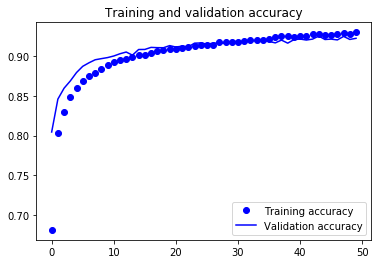

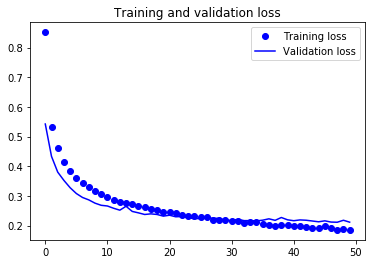

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Classification Report
We can summarize the performance of our classifier as follows

In [38]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

 9984/10000 [============================>.] - ETA: 0s

In [39]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.89      0.86      0.87      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.92      0.88      0.90      1000
    Class 3       0.92      0.96      0.94      1000
    Class 4       0.91      0.89      0.90      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.78      0.81      0.79      1000
    Class 7       0.95      0.97      0.96      1000
    Class 8       0.98      0.99      0.99      1000
    Class 9       0.97      0.96      0.97      1000

avg / total       0.93      0.93      0.93     10000



It's apparent that our classifier is underperforming for class 6 in terms of both precision and recall. For class 2, classifier is slightly lacking precision whereas it is slightly lacking recall (i.e. missed) for class 4.

Perhaps we would gain more insight after visualizing the correct and incorrect predictions.

Here is a subset of correctly predicted classes.

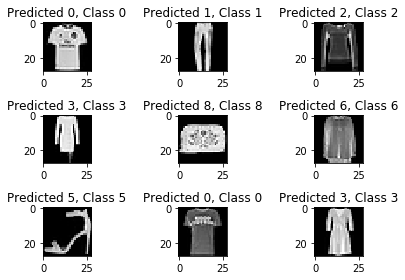

In [40]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

And here is a subset of incorrectly predicted classes.

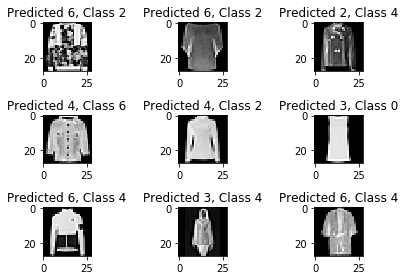

In [41]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

It looks like diversity of the similar patterns present on multiple classes effect the performance of the classifier although CNN is a robust architechture. A jacket, a shirt, and a long-sleeve blouse has similar patterns: long sleeves (or not!), buttons (or not!), and so on.

#### What do the activations look like?

The snippets are taken from _Chollet, F (2017)_. The idea is the give an input data and visualize the activations of the conv layers.

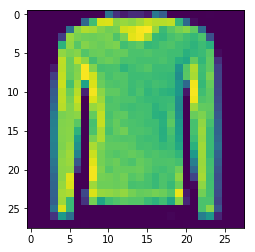

In [42]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

Let's see the activation of the 2nd channel of the first layer:

/home/batman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


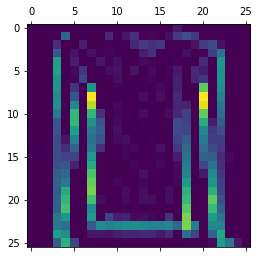

In [43]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Let's plot the activations of the other conv layers as well.

/home/batman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


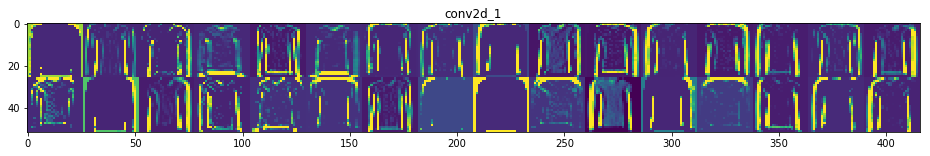

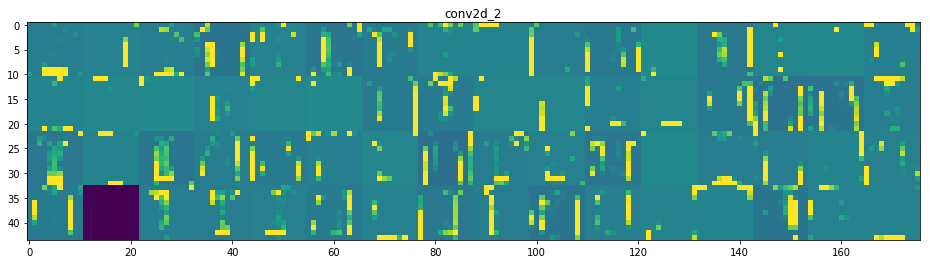

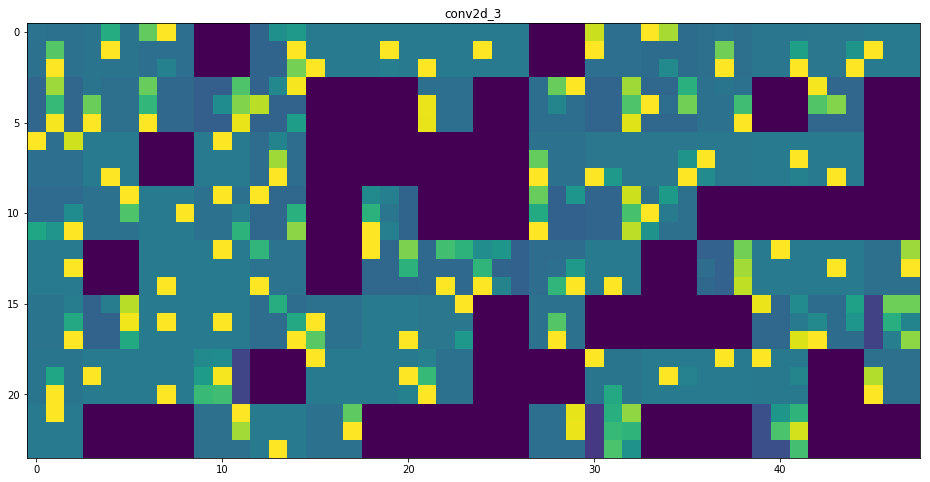

In [44]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')